Enter edges (format: u v). Type 'done' to finish:


 A B
 A C
 B D
 B E
 C F
 C G
 D H
 E H
 F G
 G H
 done


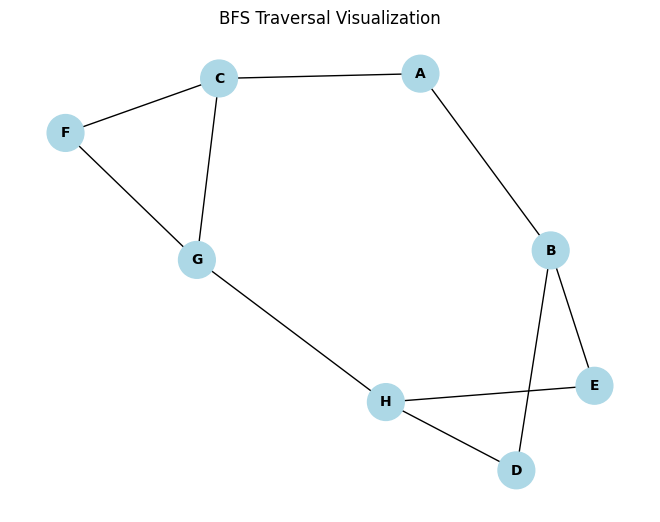


Enter the starting vertex for BFS:  A



Performing BFS:
Visited: A


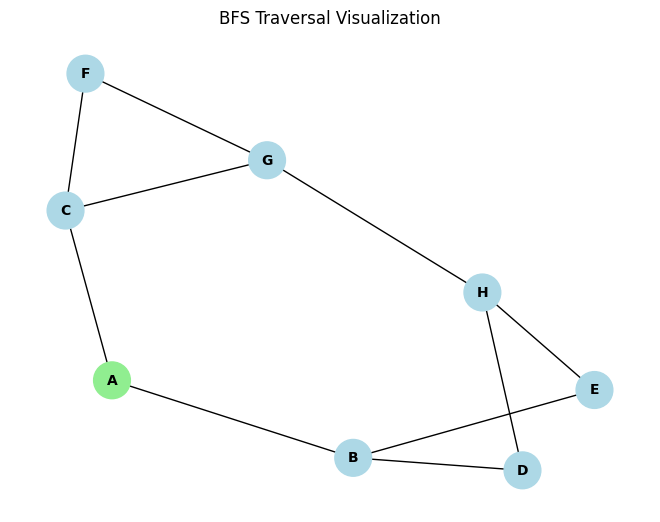

Visited: B


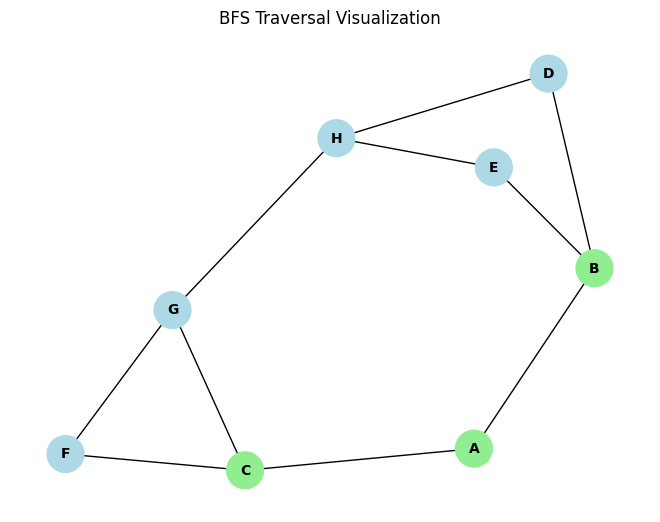

Visited: C


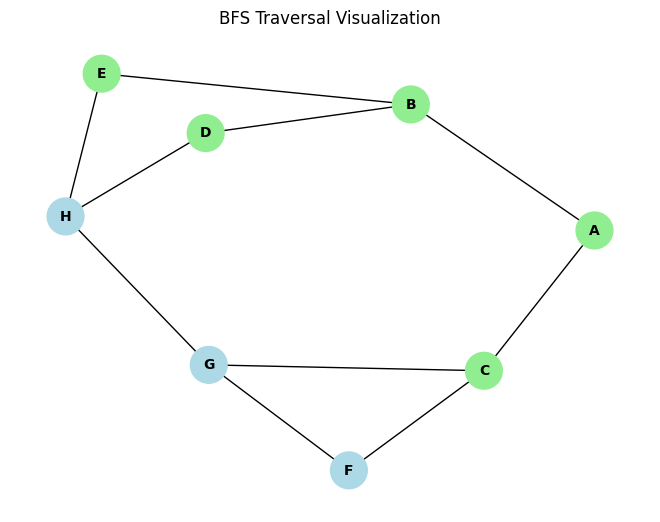

Visited: D


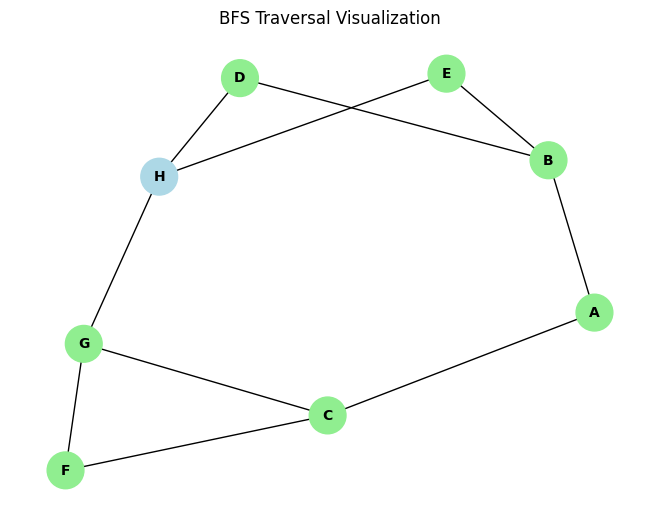

Visited: E


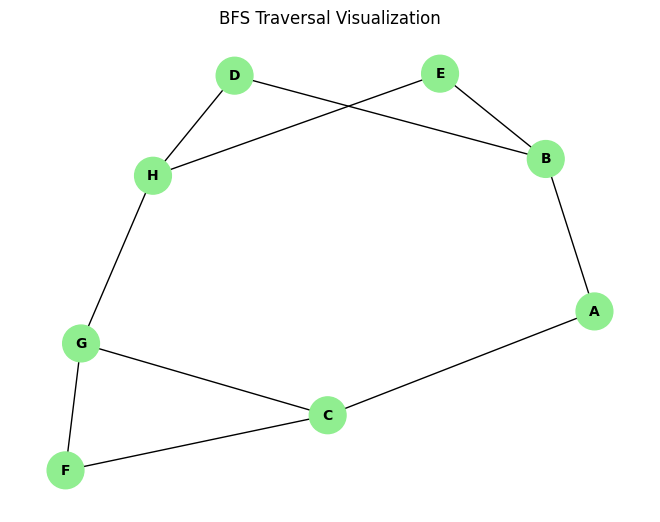

Visited: F


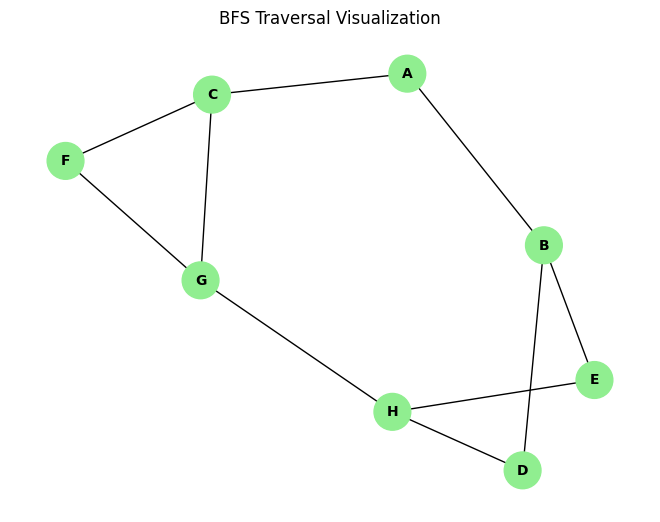

Visited: G


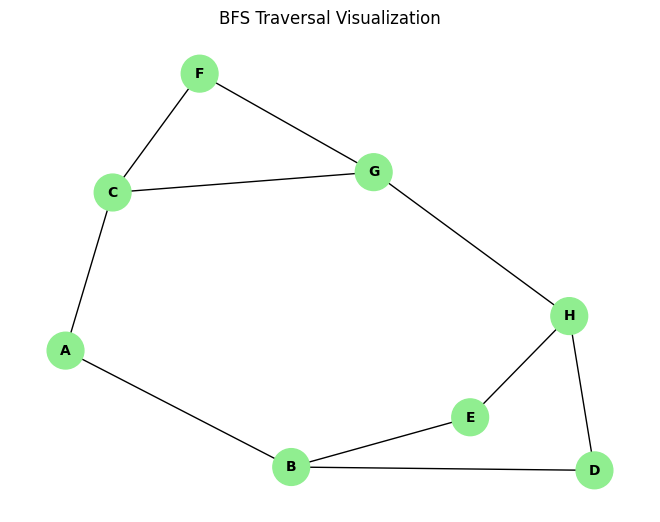

Visited: H


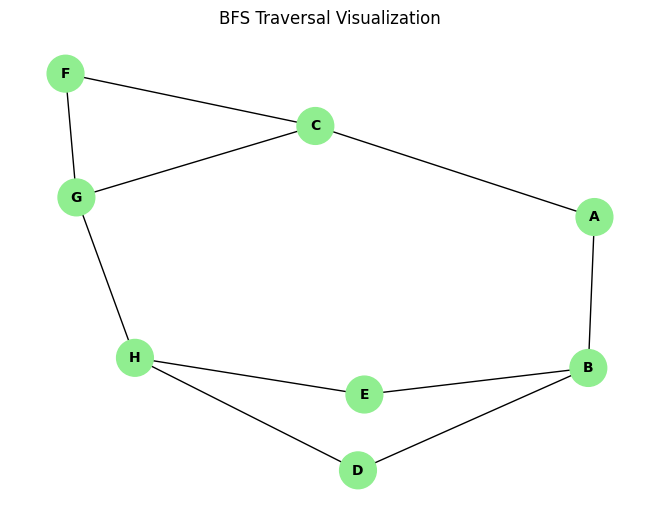


BFS Traversal Order: A -> B -> C -> D -> E -> F -> G -> H


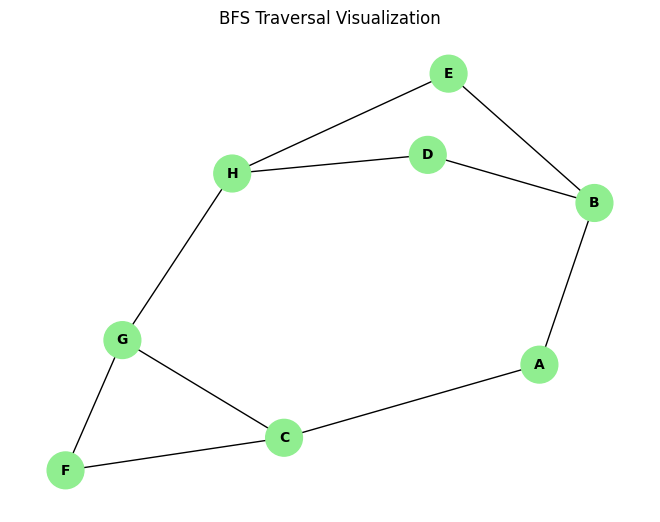

In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import time

class Graph:
    def __init__(self):
        self.graph = {}

    def add_edge(self, u, v):
        if u not in self.graph:
            self.graph[u] = []
        if v not in self.graph:
            self.graph[v] = []
        self.graph[u].append(v)
        self.graph[v].append(u)

    def draw_graph(self, visited=None):
        G = nx.Graph()
        for u in self.graph:
            for v in self.graph[u]:
                G.add_edge(u, v)
        pos = nx.spring_layout(G)
        if visited is None:
            visited = set()
        node_color = ['lightblue' if node not in visited else 'lightgreen' for node in G.nodes()]
        nx.draw(G, pos, with_labels=True, node_size=700, node_color=node_color,
                font_size=10, font_weight='bold')
        plt.title("BFS Traversal Visualization")
        plt.show()

    def bfs(self, start):
        visited = set()
        queue = [start]
        traversal_order = []
        visited.add(start)

        while queue:
            vertex = queue.pop(0)
            traversal_order.append(vertex)
            print(f"Visited: {vertex}")
            self.draw_graph(visited)
            time.sleep(1)
            for neighbor in self.graph.get(vertex, []):
                if neighbor not in visited:
                    visited.add(neighbor)
                    queue.append(neighbor)
        print("\nBFS Traversal Order:", " -> ".join(traversal_order))
        self.draw_graph(visited)

def main():
    g = Graph()
    print("Enter edges (format: u v). Type 'done' to finish:")
    while True:
        edge = input().strip()
        if edge.lower() == 'done':
            break
        try:
            u, v = edge.split()
            g.add_edge(u, v)
        except ValueError:
            print("Invalid input! Enter two nodes separated by space.")
    
    g.draw_graph()

    start_vertex = input("\nEnter the starting vertex for BFS: ").strip()
    if start_vertex in g.graph:
        print("\nPerforming BFS:")
        g.bfs(start_vertex)
    else:
        print(f"Vertex '{start_vertex}' not found.")

if __name__ == "__main__":
    main()
